In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [56]:
import sys
sys.maxsize

9223372036854775807

In [57]:
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y[0]

151.0

In [58]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [59]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [60]:
X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train
y_test_num = y_test

In [61]:
print(X_train_num)

[[ 70  50  12 ...  34  27  -1]
 [ -9  50 -18 ...  71   0  19]
 [  5 -44  49 ...  -2  17 -13]
 ...
 [ 30 -44 -20 ... -39 -10  -1]
 [-12 -44 -23 ...  -2 -38 -38]
 [-92 -44  28 ... -39  -5  -1]]


In [62]:
X_train_den = np.full(X_train.shape, 1000) 
X_test_den = np.full(X_test.shape, 1000) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))

In [63]:
print(X_train_den)

[[1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 ...
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]
 [1000 1000 1000 ... 1000 1000 1000]]


In [64]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

In [65]:
#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = 1;sum1 =0
    for i in a_den:
        lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den
    

In [66]:
#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
#     print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

In [67]:
#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den

In [68]:
#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff



In [69]:
#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
#         print("printing X",len(x_num[i]))
#         print("printing X",len(x_den[i]))
#         print("printing y diff",len( y_num))
#         print("printing y diff", len(y_den))
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        del_w_num[i] = del_w_num[i]*2
        del_w_den[i] = del_w_den[i]*n
#     print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den

    
    

In [70]:
#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den

In [71]:
# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

In [72]:
#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(10) 
    wn_den = np.zeros(10)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i]) * 100)
        wn_den[i] = 100
    bnum = int(bnum/bden * 100)
    bden = 100
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden

In [73]:
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,1000]

In [20]:
#getting y_hat = wx+b and , this matches with my main code
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,1000]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))

    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
print(wnum,wden, bnum, bden)

[63. 62. 67. 66. 62. 62.  0. 63. 66. 66.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 12946 100


In [21]:
loss1000 = []
for i in range(len(loss_num)):
    loss1000.append(loss_num[i]/loss_den[i])

In [22]:
#getting y_hat = wx+b and , this matches with my main code
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,100]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))

    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
print(wnum,wden, bnum, bden)

[ 1096.     0.  4021.  2979.  1095.   444. -1938.  2351.  3238.  2168.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 15317 100


In [23]:
loss100 = []
for i in range(len(loss_num)):
    loss100.append(loss_num[i]/loss_den[i])

In [24]:
#getting y_hat = wx+b and , this matches with my main code
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [1,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))

    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
print(wnum,wden, bnum, bden)

[  5389.  -3888.  26692.  19010.   2584.     86. -14313.  13568.  22168.
  13317.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 15224 100


In [25]:
loss10 = []
for i in range(len(loss_num)):
    loss10.append(loss_num[i]/loss_den[i])

In [26]:
print(loss10)

[29393.418535016997, 26013.158901983003, 18823.88848555241, 14217.909514164307, 11267.327893767706, 9376.665657790369, 8163.659601416431, 7384.937877053824, 6883.76508470255, 6560.281305665722, 6350.311126912181, 6213.244673654391, 6122.942026912181, 6062.573724362606, 6021.197377620397, 5992.032472521247, 5970.792252974505, 5954.537645609065, 5941.538657223796, 5930.598966005666, 5920.916467988669, 5912.13158101983, 5903.895479320114, 5896.1247288951845, 5888.5403303116145, 5881.096759773372, 5873.8324569405095, 5866.584242776204, 5859.476175920679, 5852.361078186969, 5845.300838526912, 5838.281117847026, 5831.3317101983, 5824.287124645893, 5817.322385835694, 5810.357469405099, 5803.515210481586, 5796.544711048158, 5789.667937110482, 5782.798909631728, 5775.909879886685, 5769.086811331445, 5762.277039660056, 5755.497387252125, 5748.728084419264, 5742.064678186969, 5735.363468271955, 5728.6449569405095, 5722.025384135977, 5715.390557790368, 5708.785954390934, 5702.205404249292, 5695.65

In [27]:
#getting y_hat = wx+b and , this matches with my main code
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [5,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)
#     print("mse",mse_num, mse_den)
    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
#     print("y_diff printing",y_diff)

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))
#     print("delta w values", delw_num, delw_den)
    # get delta_b
    delb_num, delb_den = delta_b(y_diff)
#     print("delta b ", delb_num, delb_den)
    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
print("normalized weights",wnum,wden, bnum, bden);

normalized weights [  3955. -20105.  51093.  32687.  -6955. -11645. -21492.  14565.  37639.
  11384.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 15132 100


In [28]:
loss5 = []
for i in range(len(loss_num)):
    loss5.append(loss_num[i]/loss_den[i])

In [29]:
print(loss5,loss10,loss100,loss1000)

[29393.418535016997, 15155.734501699717, 6040.848470538243, 6002.2884699716715, 5964.34492549575, 5926.960230594901, 5890.171046458923, 5853.881870538244, 5818.240237677054, 5783.058044192635, 5748.490533144476, 5714.512258356941, 5681.000150424929, 5647.967129745042, 5615.537634560907, 5583.484649575071, 5551.976848158641, 5520.914264872521, 5490.375361756374, 5460.255443909348, 5430.608220113314, 5401.3958396600565, 5372.609464589235, 5344.24165835694, 5316.316665155808, 5288.845100283286, 5261.734093767705, 5234.986020396601, 5208.71562917847, 5182.874893484419, 5157.371481869688, 5132.27306062323, 5107.48629348442, 5083.054131728045, 5059.033056373938, 5035.374376203966, 5012.050091501416, 4989.12517223796, 4966.41967592068, 4944.14018470255, 4922.127513597734, 4900.44293427762, 4879.126375354108, 4858.097039943343, 4837.337525212464, 4816.876977620396, 4796.704768555241, 4776.817264022663, 4757.296333994334, 4738.016213597733, 4719.037588385269, 4700.312098300284, 4681.84570963172

In [30]:
# losses = {}
# for lr in [0.5, 0.1, 0.01, 0.001]:
#     model = LinearRegression(learning_rate=lr)
#     model.fit(X_train, y_train)
#     losses[f'LR={str(lr)}'] = model.loss
    
# import matplotlib.pyplot as plt  
# xs = np.arange(len(loss5))

# plt.plot(xs, loss5, lw=3, label="LR = 0.5")
# plt.plot(xs, loss10, lw=3, label="LR = 0.1")
# plt.plot(xs, loss100, lw=3, label="LR = 0.01")
# plt.plot(xs, loss1000, lw=3, label="LR = 0.001")
# plt.title('Loss per iteration (MSE) for different learning rates in Fractions', size=20)
# plt.xlabel('Iteration', size=14)
# plt.ylabel('Loss', size=14)
# plt.legend()
# plt.show()

In [31]:
# import matplotlib.pyplot as plt  
# xs = np.arange(len(loss5))
# # plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")


# plt.plot(xs, loss5, lw=3, label=f"LR = 0.5, Final ={int(loss5[-1])} ")
# plt.plot(xs, loss10, lw=3, label=f"LR = 0.1, final ={int(loss10[-1])}")
# plt.plot(xs, loss100, lw=3, label=f"LR = 0.01, final ={int(loss100[-1])}")
# plt.plot(xs, loss1000, lw=3, label=f"LR = 0.001, final ={int(loss1000[-1])}")
# # plt.title('Fraction computation MSE for different learning rate', size=20)
# plt.xlabel('Iteration', size=14)
# plt.ylabel('Loss', size=14)
# plt.legend()

# plt.savefig("python-fraction.pdf")
# plt.show()

In [32]:
# gcd(10,100)

In [33]:
print("normalized weights",wnum,wden, bnum, bden);

normalized weights [  3955. -20105.  51093.  32687.  -6955. -11645. -21492.  14565.  37639.
  11384.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 15132 100


In [34]:
w = wnum/wden
w

array([  39.55, -201.05,  510.93,  326.87,  -69.55, -116.45, -214.92,
        145.65,  376.39,  113.84])

In [35]:
b = bnum/bden
b

151.32

In [36]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [37]:
# perform prediction

pred =[]
for i in range(X_test.shape[0]):
    sum =0
    for j in range (len(wnum)):
        sum = sum + X_test[i][j] * w[j]
    pred.append(sum+b)
print(pred)

[142.90032839369454, 176.76467546390546, 142.00366711675963, 289.610239914244, 125.12468428892338, 98.8567240412199, 252.68127407280184, 192.31967318468188, 88.32608531983533, 115.86811970569973, 96.36554752431405, 153.99928187365418, 65.49754664201006, 209.39186390623985, 105.4907241721231, 135.3988166473613, 223.5845537150708, 246.72104181774205, 193.42457079824442, 213.53691167966136, 200.43755061192246, 89.12692253114946, 76.261277612766, 188.57275888556177, 153.90029929712065, 164.44508105582773, 187.81576826505332, 176.11113682686073, 51.51982716565752, 117.26729753651335, 179.70102888347964, 94.35767059010972, 133.28269355474794, 181.95409791850543, 172.93987990787375, 190.31272386275054, 126.93995835318455, 123.88762804658897, 152.87871223232955, 60.93842853081571, 81.49263486719147, 112.10983205445612, 158.34620656023873, 153.60813918748036, 173.48652215958336, 65.92763045003986, 82.34991428170258, 105.50012866583563, 61.29501022773594, 154.69369583255926, 152.1129698055243, 6

In [38]:
y_pred = np.array(pred)
y_pred

array([142.90032839, 176.76467546, 142.00366712, 289.61023991,
       125.12468429,  98.85672404, 252.68127407, 192.31967318,
        88.32608532, 115.86811971,  96.36554752, 153.99928187,
        65.49754664, 209.39186391, 105.49072417, 135.39881665,
       223.58455372, 246.72104182, 193.4245708 , 213.53691168,
       200.43755061,  89.12692253,  76.26127761, 188.57275889,
       153.9002993 , 164.44508106, 187.81576827, 176.11113683,
        51.51982717, 117.26729754, 179.70102888,  94.35767059,
       133.28269355, 181.95409792, 172.93987991, 190.31272386,
       126.93995835, 123.88762805, 152.87871223,  60.93842853,
        81.49263487, 112.10983205, 158.34620656, 153.60813919,
       173.48652216,  65.92763045,  82.34991428, 105.50012867,
        61.29501023, 154.69369583, 152.11296981,  65.50256781,
       116.85824136, 109.47438034, 170.36904087, 154.52102944,
        98.76967822, 202.87378828, 114.95293148,  68.5461761 ,
       183.56349125, 195.68595121, 141.40762017, 111.90

In [39]:
score=r2_score(y_test,y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.4591714169970166
mean_sqrd_error is== 2865.391902685012
root_mean_squared error of is== 53.529355522787796


In [40]:
y_pred = np.sort(y_pred)
y_pred

array([ 51.51982717,  54.81323778,  60.76832497,  60.93842853,
        61.29501023,  63.5119549 ,  65.49754664,  65.50256781,
        65.92763045,  68.5461761 ,  76.26127761,  77.58237038,
        81.49263487,  82.34991428,  82.36825603,  88.21488271,
        88.32608532,  89.12692253,  94.35767059,  96.36554752,
        98.76967822,  98.85672404, 105.49072417, 105.50012867,
       109.47438034, 111.90018868, 112.10983205, 112.26974205,
       112.76574232, 114.95293148, 115.86811971, 115.93767736,
       116.85824136, 117.26729754, 123.88762805, 125.12468429,
       126.23284683, 126.93995835, 130.36294308, 133.28269355,
       135.39881665, 140.23553862, 141.40762017, 141.90431311,
       142.00366712, 142.90032839, 151.37064456, 152.11296981,
       152.87871223, 153.60813919, 153.9002993 , 153.99928187,
       154.52102944, 154.69369583, 157.93452781, 158.34620656,
       160.05554531, 160.16840485, 164.44508106, 168.94311404,
       170.36904087, 172.93987991, 173.48652216, 176.11

In [41]:
y_test = np.sort(y_test)
y_test

array([ 37.,  42.,  48.,  48.,  52.,  52.,  60.,  61.,  63.,  63.,  64.,
        67.,  68.,  69.,  70.,  72.,  72.,  72.,  77.,  84.,  84.,  87.,
        89.,  90.,  90.,  90.,  91.,  94.,  94.,  95.,  96.,  96.,  98.,
        99., 101., 102., 107., 108., 110., 111., 113., 118., 122., 128.,
       129., 135., 136., 140., 140., 151., 153., 156., 158., 164., 168.,
       168., 170., 171., 172., 180., 181., 184., 186., 187., 190., 200.,
       202., 202., 214., 219., 220., 222., 230., 232., 233., 233., 237.,
       242., 248., 252., 258., 263., 264., 272., 275., 281., 295., 297.,
       310.])

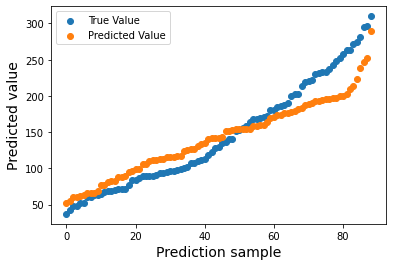

In [42]:
import matplotlib.pyplot as plt
x = np.arange(len(y_test))
plt.scatter(x, y_test,label="True Value")
plt.scatter(x, y_pred,label="Predicted Value")
plt.xlabel('Prediction sample', size=14)
plt.ylabel('Predicted value', size=14)
plt.legend()
plt.savefig('MLR-1000.pdf')
plt.show()

In [81]:
wnum = np.ones(10)
wden = np.ones(10)
b =[1,1]
bnum =1
bden =1
lr = [5,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)
#     print("mse",mse_num, mse_den)
    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
#     print("y_diff printing",y_diff)

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))
#     print("delta w values", delw_num, delw_den)
    # get delta_b
    delb_num, delb_den = delta_b(y_diff)
#     print("delta b values", delb_num, delb_den)
    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
print("normalized weights",wnum,wden, bnum, bden);

normalized weights [  3955. -20105.  51093.  32687.  -6955. -11645. -21492.  14565.  37639.
  11384.] [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] 15132 100


In [82]:
w = wnum/wden
b = bnum/bden
pred =[]
for i in range(X_test.shape[0]):
    sum1 =0
    for j in range (len(wnum)):
        sum1 = sum1 + X_test[i][j] * w[j]
    pred.append(sum1+b)
y_pred = np.array(pred)
# y_pred = np.sort(y_pred)
# y_test = np.sort(y_test)

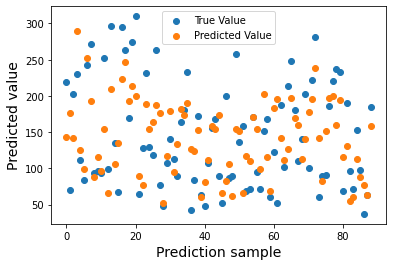

In [83]:
import matplotlib.pyplot as plt
x = np.arange(len(y_test))
plt.scatter(x, y_test,label="True Value")
plt.scatter(x, y_pred,label="Predicted Value")
plt.xlabel('Prediction sample', size=14)
plt.ylabel('Predicted value', size=14)
plt.legend()
plt.savefig('MLR-200.pdf')
plt.show()

In [84]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.4591714169970166
mean_sqrd_error is== 2865.391902685012
root_mean_squared error of is== 53.529355522787796
